# Outlier Detection

Outliers are datapoints that differ significantly from other datapoints and is unusual. It doesn't follow the pattern of that all the other.

basically, we call a datapoint an outlier because the probability of a datapoint having the value that the outlier has is very low


<img src="https://lh3.googleusercontent.com/proxy/pWqJFUfDQnJbFs9yodsQM6cyySn3Bm7P4y3TNlqOaYgFY5gsf--LjAqVLQ-a-ie01osWNM3qovBBUloo-oRKGBHWqwcXdiuzT2l_ILZpRRX-4sCSHE9I" />


## Why do we need to remove outliers or detect them ?

<b>case 1 : </b><br>
Consider a situation where a big manufacturing company is manufacturing an airplane. An airplane has different parts and we don't want any parts to behave in an unusual way. these unusual behaviours might be because of various reasons. we want to detect these parts before it is fixed in an airplane else the lives of the passengers might be in danger.

<b> case 2: </b><br>

<img src="https://cdn-0.r-statistics.co/screenshots/outliers_effect.png" />

As you can see in the Above Image, how outliers can affect the equation of the line of best fit. So, before performing it is important to remove outliers in order to get the most accurate predictions 

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
#define x1 and x2
x1 = np.arange(1,50,1)
x2 = np.square(x1) + np.random.randint(-200,200)


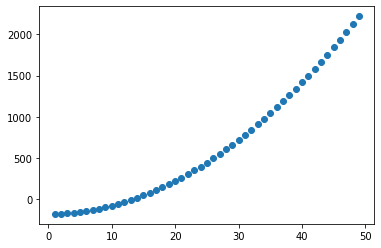

In [ ]:
#plotting the data
plt.scatter(x1,x2)

Adding an outlier manually to the data

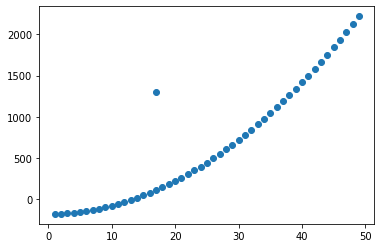

In [ ]:
#adding outliers
x1 = np.append(x1,17)
x2 = np.append(x2,1300)
data = np.stack((x1,x2),axis=1)
plt.scatter(x1,x2)

# Trying 2 Methods to Detect Anomalies in the Dataset

In this notebook , I have tried Interquartile range method and also Multivariate Gaussian Distribution to check which method performs better.



# Interquartile range method

<img src="https://naysan.ca/wp-content/uploads/2020/06/box_plot_ref_needed.png" />

In this method , we find a certain range and if the outlier lies outside this range, We classify them as outliers


In [ ]:
#sorting the array
x1_sorted = np.sort(x1)

#first half and second half
first_half = x1_sorted[x1_sorted < np.median(x1_sorted)]
second_half = x1_sorted[x1_sorted > np.median(x1_sorted)]

#q1 and q3
q1 = first_half[int((first_half.shape[0]+1)/2)]
q3 = second_half[int((second_half.shape[0]+1)/2)]
iqr = q3 - q1 #calculate iqr

#min and max
minimum_val1 = q1 - 1.5*iqr
maximum_val1 = q3 + 1.5*iqr

print("Range : ",minimum_val1,"-",maximum_val1)

Range :  -22.0 - 74.0


In [ ]:
#sorting the array
x2_sorted = np.sort(x2)

#first half and second half
first_half = x2_sorted[x2_sorted < np.median(x2_sorted)]
second_half = x2_sorted[x2_sorted > np.median(x2_sorted)]

#q1 and q3
q1 = first_half[int((first_half.shape[0]+1)/2)]
q3 = second_half[int((second_half.shape[0]+1)/2)]
iqr = q3 - q1 #calculate iqr

#min and max
minimum_val2 = q1 - 1.5*iqr
maximum_val2 = q3 + 1.5*iqr

print("Range : ",minimum_val2,"-",maximum_val2)

Range :  -1912.5 - 3227.5


# Will this model Detect the outlier ?

In [ ]:
def detect_x(x_data,min,max):
  outlier_x = []
  for i in x_data:
    if i < min or i > max:
      outlier_x.append(i)
  if len(outlier_x) > 0:
    print(outlier_x)
  else:
    print("No outliers Detected")

In [ ]:
detect_x(x1,minimum_val1,maximum_val1)
detect_x(x2,minimum_val2,maximum_val2)

No outliers Detected
No outliers Detected


This Method Failed to detect Outliers in a when multiple variables are involved

# Anomaly Detection using MultiVariate Normal(Gaussian) Distribution

<img src="https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png" />

In this method , we calculate the probability for a particular datapoint. If the probability of occurence of that point is lower than a particular threshold , we say that it is an outlier.
This threshold value is chosen manually.


In [ ]:
from scipy.stats import multivariate_normal

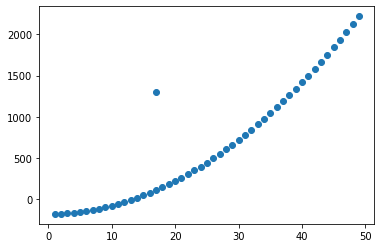

In [ ]:
plt.scatter(data[:,0],data[:,1])

In [ ]:
#calculate the covariance matrix
data = np.stack((x1,x2),axis=0)
covariance_matrix = np.cov(data)

#calculating the mean
mean_values = [np.mean(x1),np.mean(x2)]

#multivariate_normal_distribution
model = multivariate_normal(cov=covariance_matrix,mean=mean_values)
data = np.stack((x1,x2),axis=1)

#finding the outliers
threshhold = 1.0e-07
outlier = model.pdf(data).reshape(-1) < threshhold

In [ ]:
for boolean,i in enumerate(outlier):
  if i == True:
    print(data[boolean]," is an Outlier")

[  17 1300]  is an Outlier


# Multivariate Normal Distribution found the outliers succesfully

The first method doesn't account for the relationship between 2 variables and hence, fails to detect the outliers when multiple variables are invloved.

The second method uses the power of covariance matrix to account for the relationship between multiple variables and proves succesful in detecting these outliers

# My Interpretaions


1. The reason I compared these 2 methods was that most of the time the first method and another method called z-score method were used to remove outliers as preprocessing in regression or classification problems.

2. As z-score method and interquartile range methods doesn't consider the relationship between multiple variables when detecting outliers, some outliers will be very hard to detect with these methods when multiple variables are involved

3. wheras, Multivariate normal distribution uses covariance matrix to find how a variable changes with respect to other and hence is able to detec outliers

4. z-score method and interquartile method can also detect outliers when multiple variables are involved but, the datapoint of the outlier must far away from the entire range of data in the dataset but it will not be able to detect outliers both the co-ordinates are not far away from the range of values of the co-ordinate of all the data in the dataset

5. I might be wrong , but the reason why z-score and interquartile range methods are used in pre-processing is that because they are easier to implement and also they can remove outliers that exist far away from the entire range of dataset which would be more than enough for machine learning models to fit